# Modeling and Simulation in Python

Chapter 3:

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


We'll start with the same code we saw last time: the magic command that tells Jupyter where to put the figures, and the import statement that gets the function defined in the `modsim` module.

In [1]:
# If you want the figures to appear in the notebook, use
# %matplotlib notebook

# If you want the figures to appear in separate windows, use
# %matplotlib qt

# To switch from one to another, you have to select Kernel->Restart

%matplotlib notebook

from modsim import *

In [2]:
from pandas import read_html

In [3]:
url = 'https://en.wikipedia.org/wiki/World_population_estimates'
dfs = read_html(url, header=0, index_col=0, decimal='M')

In [4]:
df1 = dfs[1]
df1.head()

,Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2010)[citation needed],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[15],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.0,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.columns = ['prb', 'un', 'maddison', 'hyde', 'tanton', 
              'biraben', 'mj', 'thomlinson', 'durand', 'clark']

In [6]:
df2 = dfs[2]
df2.head()

,United States Census Bureau (2015)[18],Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2007)[15],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2525149000,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2572850917,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2619292068,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2665865392,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2713172027,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2.columns = ['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 
              'biraben', 'mj', 'thomlinson', 'durand', 'clark']

In [8]:
census = df2.census
census

Year
1950    2557628654
1951    2594939877
1952    2636772306
1953    2682053389
1954    2730228104
1955    2782098943
1956    2835299673
1957    2891349717
1958    2948137248
1959    3000716593
1960    3043001508
1961    3083966929
1962    3140093217
1963    3209827882
1964    3281201306
1965    3350425793
1966    3420677923
1967    3490333715
1968    3562313822
1969    3637159050
1970    3712697742
1971    3790326948
1972    3866568653
1973    3942096442
1974    4016608813
1975    4089083233
1976    4160185010
1977    4232084578
1978    4304105753
1979    4379013942
           ...    
1986    4940571232
1987    5027200492
1988    5114557167
1989    5201440110
1990    5288955934
1991    5371585922
1992    5456136278
1993    5538268316
1994    5618682132
1995    5699202985
1996    5779440593
1997    5857972543
1998    5935213248
1999    6012074922
2000    6088571383
2001    6165219247
2002    6242016348
2003    6318590956
2004    6395699509
2005    6473044732
2006    6551263534
2007   

In [9]:
census.values

array([2557628654, 2594939877, 2636772306, 2682053389, 2730228104,
       2782098943, 2835299673, 2891349717, 2948137248, 3000716593,
       3043001508, 3083966929, 3140093217, 3209827882, 3281201306,
       3350425793, 3420677923, 3490333715, 3562313822, 3637159050,
       3712697742, 3790326948, 3866568653, 3942096442, 4016608813,
       4089083233, 4160185010, 4232084578, 4304105753, 4379013942,
       4451362735, 4534410125, 4614566561, 4695736743, 4774569391,
       4856462699, 4940571232, 5027200492, 5114557167, 5201440110,
       5288955934, 5371585922, 5456136278, 5538268316, 5618682132,
       5699202985, 5779440593, 5857972543, 5935213248, 6012074922,
       6088571383, 6165219247, 6242016348, 6318590956, 6395699509,
       6473044732, 6551263534, 6629913759, 6709049780, 6788214394,
       6866332358, 6944055583, 7022349283, 7101027895, 7178722893,
       7256490011])

In [10]:
census.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year')

In [11]:
un = df2.un

<IPython.core.display.Javascript object>


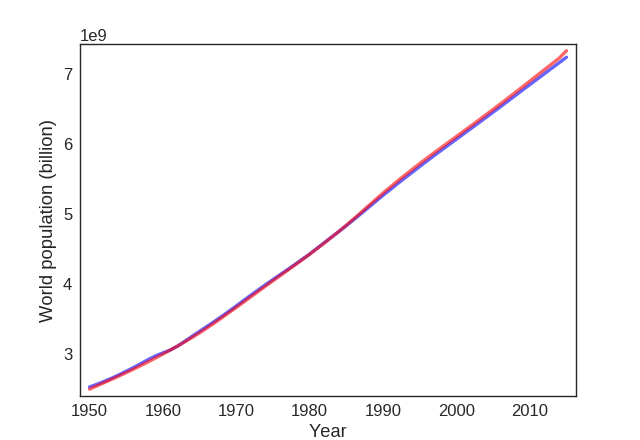

In [12]:
newfig()
plot(census, 'b-')
plot(un, 'r-')
label_axes(xlabel='Year', ylabel='World population (billion)')


In [13]:
census_billions = census / 1e9

In [29]:
model = Series([])

In [30]:
model[1950] = census_billions[1950]
model

1950    2.557629
dtype: float64

In [31]:
for year in arange(1951, 2017):
    model[year] = model[year-1]

<IPython.core.display.Javascript object>


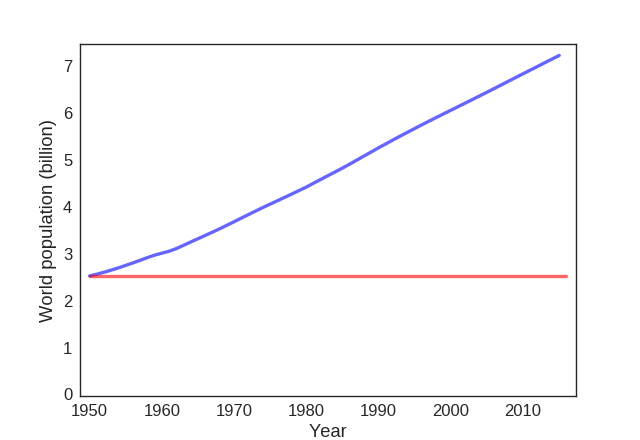

In [33]:
newfig()
plot(census_billions, 'b-')
plot(model, 'r-')
annotate(xlabel='Year', ylabel='World population (billion)', ylim=[0, 7.5])

## Now with state objects

In [38]:
def run_model0(state):
    model = Series([])
    model[state.t0] = state.initial_pop
    for year in arange(state.t0+1, state.t_end+1):
        model[year] = model[year-1]
    state.model = model

In [39]:
first_year = census_billions.index[0]
last_year = census_billions.index[-1]
first_year, last_year

(1950, 2015)

In [40]:
def plot_model(state):
    newfig()
    plot(census_billions, 'b-')
    plot(state.model, 'r-')
    annotate(xlabel='Year', ylabel='World population (billion)', ylim=[0, 7.5])

<IPython.core.display.Javascript object>


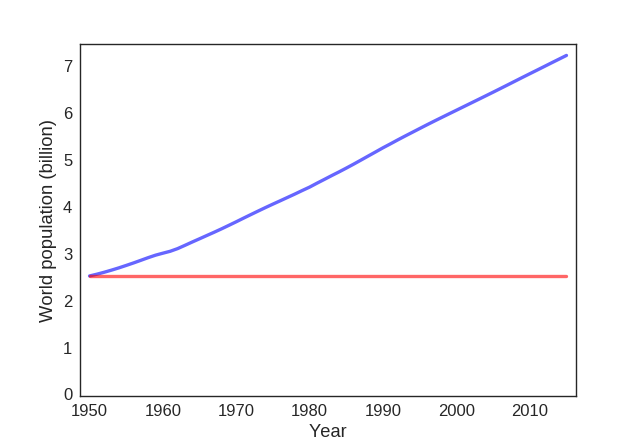

In [41]:
state = State(t0=first_year, t_end=last_year,
              initial_pop=census_billions[first_year])
run_model0(state)
plot_model(state)

In [42]:
total_growth = census_billions[last_year] - census_billions[first_year]
elapsed_time = last_year - first_year
annual_growth = total_growth / (elapsed_time)
annual_growth

0.07229017472307693

In [43]:
def run_model1(state):
    model = Series([])
    model[state.t0] = state.initial_pop
    for year in arange(state.t0+1, state.t_end+1):
        model[year] = model[year-1] + state.annual_growth
    state.model = model

<IPython.core.display.Javascript object>


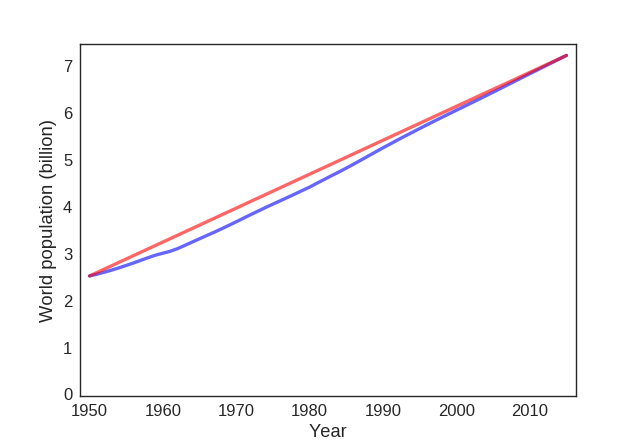

In [44]:
state.annual_growth = annual_growth
run_model1(state)
plot_model(state)

In [27]:
def run_model2(state):
    model = Series([])
    model[state.t0] = state.initial_pop
    for year in arange(state.t0+1, state.t_end+1):
        deaths = state.death_rate * model[year-1]
        model[year] = model[year-1] + state.annual_growth - deaths
    state.model = model

<IPython.core.display.Javascript object>


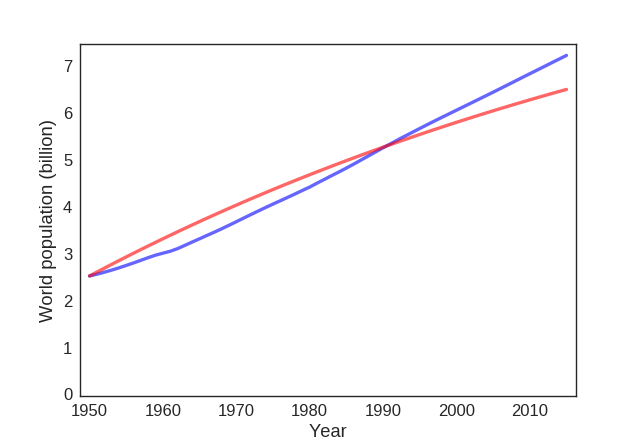

In [47]:
state.death_rate = 0.01
state.annual_growth = annual_growth * 1.5

run_model2(state)
plot_model(state)

In [49]:
def run_model3(state):
    model = Series([])
    model[state.t0] = state.initial_pop
    for year in arange(state.t0+1, state.t_end+1):
        births = state.birth_rate * model[year-1]
        deaths = state.death_rate * model[year-1]
        model[year] = model[year-1] + births - deaths
    state.model = model

<IPython.core.display.Javascript object>


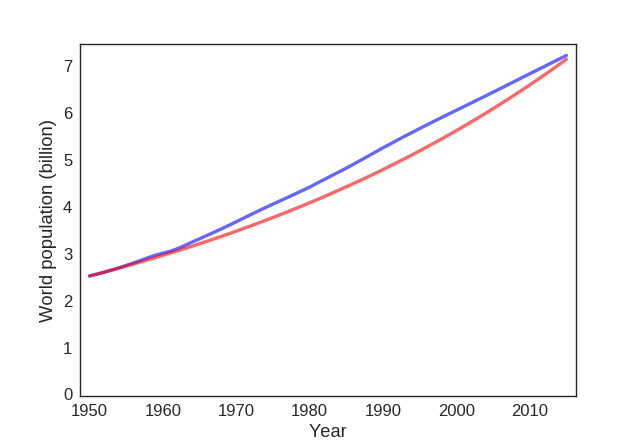

In [57]:
state.death_rate = 0.01
state.birth_rate = 0.026

run_model3(state)
plot_model(state)